In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
# Initialize the ticker object for Polkadot (DOT)
xrp_ticker = yf.Ticker("XRP-USD")

In [3]:
if os.path.exists("xrp.csv"):
    xrp = pd.read_csv("xrp.csv", index_col=0)
else:
    xrp = xrp_ticker.history(period="max")
    xrp.to_csv("xrp.csv")

In [4]:
xrp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,0.217911,0.221791,0.214866,0.217488,147916992,0.0,0.0
2017-11-10 00:00:00+00:00,0.218256,0.219068,0.205260,0.206483,141032992,0.0,0.0
2017-11-11 00:00:00+00:00,0.205948,0.214456,0.205459,0.210430,134503008,0.0,0.0
2017-11-12 00:00:00+00:00,0.210214,0.210214,0.195389,0.197339,251175008,0.0,0.0
2017-11-13 00:00:00+00:00,0.197472,0.204081,0.197456,0.203442,132567000,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-11 00:00:00+00:00,0.617559,0.620889,0.603658,0.608880,1218887360,0.0,0.0
2024-04-12 00:00:00+00:00,0.608880,0.615305,0.518316,0.548414,2872824835,0.0,0.0
2024-04-13 00:00:00+00:00,0.548412,0.548838,0.433634,0.480819,3957442555,0.0,0.0


In [5]:
xrp.index = pd.to_datetime(xrp.index)

In [6]:
del xrp["Dividends"]# delete dividends and stock splits column
del xrp["Stock Splits"]

In [7]:
xrp.columns = [c.lower() for c in xrp.columns] #convert to lower case

<Axes: xlabel='Date'>

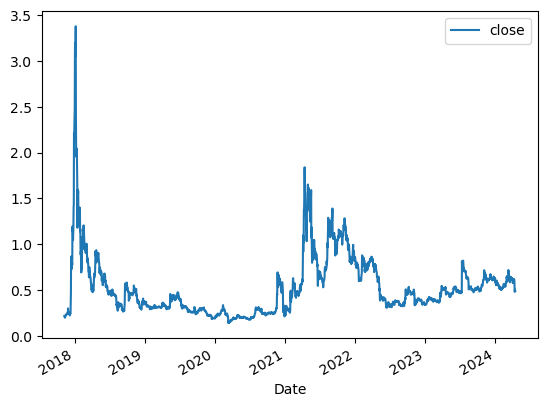

In [8]:
xrp.plot.line(y="close", use_index=True)

In [9]:
wiki = pd.read_csv("wikipedia_edits_xrp.csv", index_col=0, parse_dates=True)

In [10]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.066667,-0.008359,0.033333
2009-04-07,0.066667,-0.008359,0.033333
2009-04-08,0.066667,-0.008359,0.033333
2009-04-09,0.066667,-0.008359,0.033333
2009-04-10,0.066667,-0.008359,0.033333
...,...,...,...
2024-04-11,0.000000,0.000000,0.000000
2024-04-12,0.000000,0.000000,0.000000
2024-04-13,0.000000,0.000000,0.000000
2024-04-14,0.000000,0.000000,0.000000


### Preparing data for machine learning

In [11]:
wiki.index = wiki.index.tz_localize('UTC')

In [12]:
xrp = xrp.merge(wiki, left_index=True, right_index=True)

In [13]:
xrp["tomorrow"] = xrp["close"].shift(-1)

In [14]:
xrp["target"] = (xrp["tomorrow"] > xrp["close"]).astype(int)

In [15]:
xrp["target"].value_counts()

target
0    1190
1    1159
Name: count, dtype: int64

In [16]:
xrp

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2017-11-09 00:00:00+00:00,0.217911,0.221791,0.214866,0.217488,147916992,0.066667,-0.000151,0.016667,0.206483,0
2017-11-10 00:00:00+00:00,0.218256,0.219068,0.205260,0.206483,141032992,0.066667,-0.000151,0.016667,0.210430,1
2017-11-11 00:00:00+00:00,0.205948,0.214456,0.205459,0.210430,134503008,0.066667,-0.000151,0.016667,0.197339,0
2017-11-12 00:00:00+00:00,0.210214,0.210214,0.195389,0.197339,251175008,0.066667,-0.000151,0.016667,0.203442,1
2017-11-13 00:00:00+00:00,0.197472,0.204081,0.197456,0.203442,132567000,0.066667,-0.000151,0.016667,0.209825,1
...,...,...,...,...,...,...,...,...,...,...
2024-04-10 00:00:00+00:00,0.613826,0.619697,0.598688,0.617561,2345474173,0.000000,0.000000,0.000000,0.608880,0
2024-04-11 00:00:00+00:00,0.617559,0.620889,0.603658,0.608880,1218887360,0.000000,0.000000,0.000000,0.548414,0
2024-04-12 00:00:00+00:00,0.608880,0.615305,0.518316,0.548414,2872824835,0.000000,0.000000,0.000000,0.480819,0
2024-04-13 00:00:00+00:00,0.548412,0.548838,0.433634,0.480819,3957442555,0.000000,0.000000,0.000000,0.504258,1


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = xrp.iloc[:-200]
test = xrp.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5333333333333333

In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

### Evaluating error with backtesting

In [20]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

### Using an XGBoost model

In [22]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(xrp, model, predictors)

In [23]:
predictions["predictions"].value_counts()

predictions
0    702
1    552
Name: count, dtype: int64

In [24]:
precision_score(predictions["target"], predictions["predictions"])

0.5181159420289855

In [26]:
def compute_rolling(eth):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = xrp.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        xrp[ratio_column] = xrp["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        xrp[edit_column] = rolling_averages["edit_count"]

        rolling = eth.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        xrp[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return xrp, new_predictors

In [27]:
xrp, new_predictors = compute_rolling(xrp.copy())

In [28]:
predictions = backtest(xrp, model, new_predictors)

In [29]:
precision_score(predictions["target"], predictions["predictions"])

0.5167910447761194

In [30]:
predictions

,target,predictions
2020-11-08 00:00:00+00:00,0,0
2020-11-09 00:00:00+00:00,1,1
2020-11-10 00:00:00+00:00,1,0
2020-11-11 00:00:00+00:00,0,0
2020-11-12 00:00:00+00:00,1,1
...,...,...
2024-04-10 00:00:00+00:00,0,0
2024-04-11 00:00:00+00:00,0,1
2024-04-12 00:00:00+00:00,0,1
2024-04-13 00:00:00+00:00,1,0
